# MOVIE LENS RECOMMENDATION SYSTEM

## Business Understanding



## Overview
The goal of this project is to build a recommendation model that provides the top 5 personalized movie recommendations to a user based on their past ratings, preferences and perception. By analyzing user preferences and comparing them with patterns in the ratings of other users or movies, the system aims to predict what a user would enjoy watching next.

Primarily, in this project we'll use Collaborative Filtering, and hybrid approach which will combine both content based and collaborative filtering for the recomendation system.

## Objectives



**1.




## Success criteria


## Data understanding
The data seems to have been split between train and test data

In [ ]:
#importing libraries to support in data understanding and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# import the files
movies= pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

In [ ]:
# merge the csv files and rename user and timestamp columns as per table
df_merge = movies.merge(ratings, on="movieId")\
.merge(tags, on=("movieId"))
df_merge

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [ ]:
df_merge = df_merge.rename(columns={
    'userId_x': 'userId_rating',
    'timestamp_x': 'timestamp_rating',
    'userId_y': 'userId_tag',
    'timestamp_y': 'timestamp_tag'
})

In [ ]:
df_merge.shape

(233213, 9)

In [ ]:
df_merge.tail()

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603
233212,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,remaster,1537098592


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movieId           233213 non-null  int64  
 1   title             233213 non-null  object 
 2   genres            233213 non-null  object 
 3   userId_rating     233213 non-null  int64  
 4   rating            233213 non-null  float64
 5   timestamp_rating  233213 non-null  int64  
 6   userId_tag        233213 non-null  int64  
 7   tag               233213 non-null  object 
 8   timestamp_tag     233213 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 16.0+ MB


In [ ]:
df_merge.describe()

,movieId,userId_rating,rating,timestamp_rating,userId_tag,timestamp_tag
count,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,2.332130e+05
mean,12319.999443,309.688191,3.966535,1.213524e+09,470.683564,1.384774e+09
std,28243.919401,178.206387,0.968637,2.250448e+08,153.329632,1.534621e+08
min,1.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,156.000000,3.500000,1.017365e+09,424.000000,1.242494e+09
50%,1198.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09
75%,4638.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09
max,193565.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


#Data Cleaning

Handling null values

Dropping duplicates

Display and Clean Outliers



In [ ]:
# check for missing values
df_merge.isna().sum()

,0
movieId,0
title,0
genres,0
userId_rating,0
rating,0
timestamp_rating,0
userId_tag,0
tag,0
timestamp_tag,0


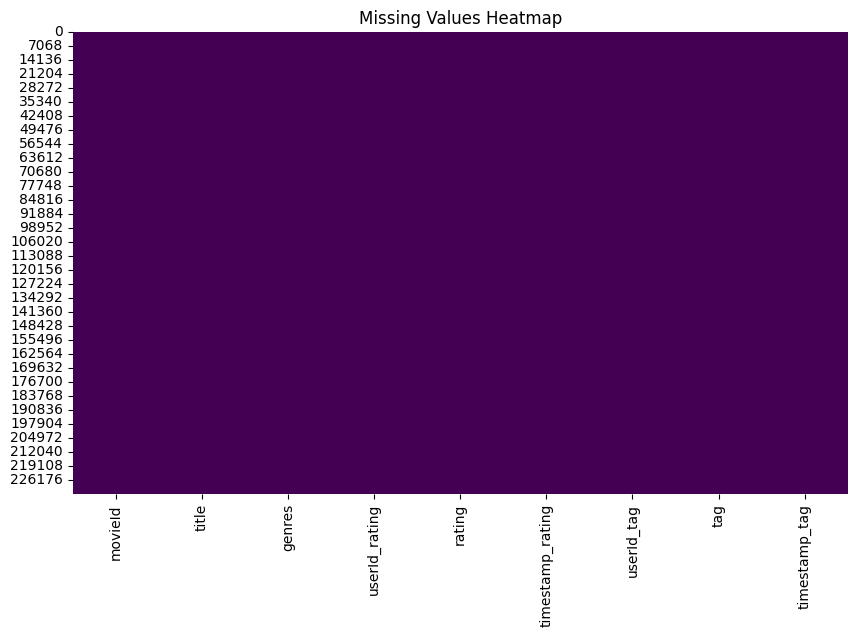

In [ ]:
# missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_merge.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# check duplicates
df_merge.duplicated().sum()

np.int64(0)

In [ ]:
# check for outliers in the dataset
Q1 = df_merge['rating'].quantile(0.25)
Q3 = df_merge['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_merge[(df_merge['rating'] < lower_bound) | (df_merge['rating'] > upper_bound)]
outliers

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
78,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,336,pixar,1139045764
79,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,474,pixar,1137206825
80,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,567,fun,1525286013
741,2,Jumanji (1995),Adventure|Children|Fantasy,149,1.0,902084874,62,fantasy,1528843929
742,2,Jumanji (1995),Adventure|Children|Fantasy,149,1.0,902084874,62,magic board game,1528843932
...,...,...,...,...,...,...,...,...,...
233155,184471,Tomb Raider (2018),Action|Adventure|Fantasy,153,0.5,1525553051,62,Alicia Vikander,1528024914
233156,184471,Tomb Raider (2018),Action|Adventure|Fantasy,153,0.5,1525553051,62,video game adaptation,1528024898
233187,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,338,1.0,1530148465,62,Josh Brolin,1527274096
233188,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,338,1.0,1530148465,62,Ryan Reynolds,1527274092


In [ ]:
df_merge.shape

(233213, 9)

In [ ]:
# checking total count per rating
df_merge['rating'].value_counts()

,count
rating,
4.0,64781
5.0,63845
4.5,31502
3.0,28550
3.5,22895
2.0,7955
2.5,6488
1.0,3721
0.5,1908


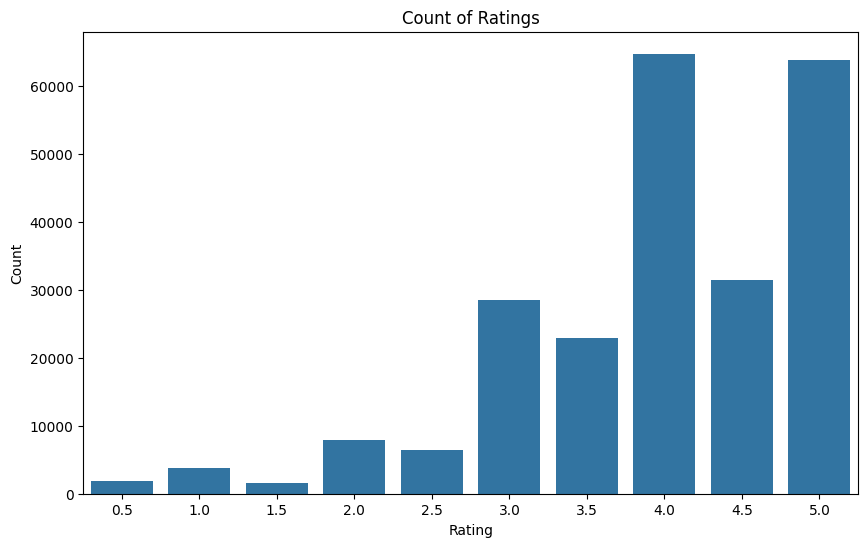

In [ ]:
# visualize the counts
plt.figure(figsize=(10, 6))
sns.countplot(x=df_merge['rating'])
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

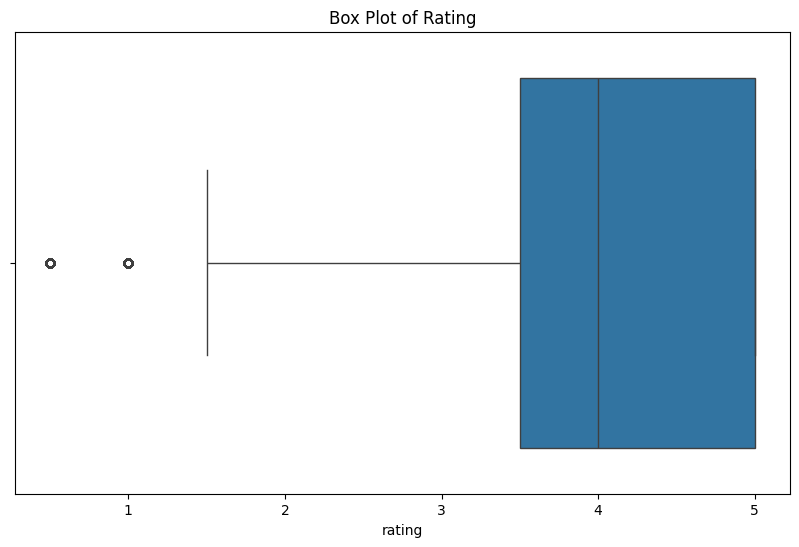

In [ ]:
# plot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merge['rating'])
plt.title('Box Plot of Rating')
plt.show()

In [ ]:
# remove outliers
df_merge_cleaned = df_merge[(df_merge['rating'] >= lower_bound) & (df_merge['rating'] <= upper_bound)]
df_merge_cleaned

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


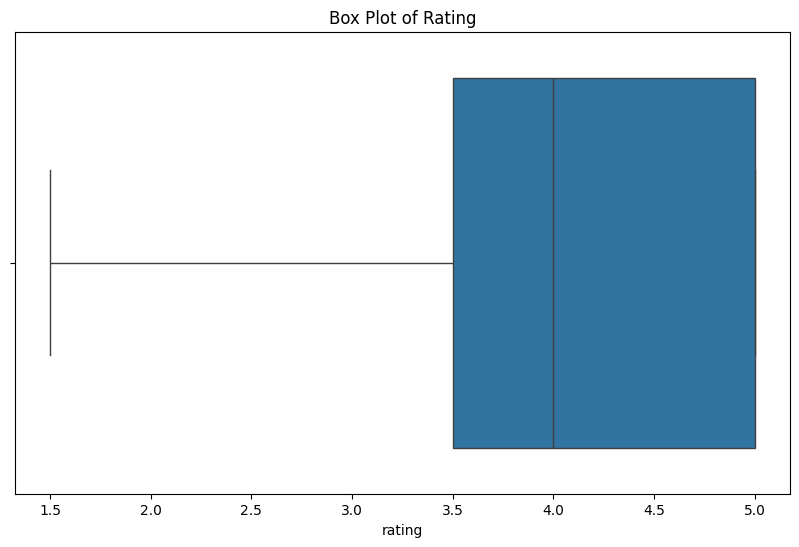

In [ ]:
# plot the cleaned dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merge_cleaned['rating'])
plt.title('Box Plot of Rating')
plt.show()

In [ ]:
df_merge_cleaned.shape

(227584, 9)

In [ ]:
# convert timestamp to datetime format
df_merge_cleaned['timestamp_rating'] = pd.to_datetime(df_merge_cleaned['timestamp_rating'], unit='s', errors='coerce')
df_merge_cleaned['timestamp_tag'] = pd.to_datetime(df_merge_cleaned['timestamp_tag'], unit='s', errors='coerce')
df_merge_cleaned

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,474,pixar,2006-01-14 02:47:05
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,567,fun,2018-05-02 18:33:33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,336,pixar,2006-02-04 09:36:04
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,474,pixar,2006-01-14 02:47:05
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,2018-06-25 04:05:56,62,star wars,2018-06-14 00:02:32
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,anime,2018-09-16 11:49:42
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,comedy,2018-09-16 11:49:47
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,gintama,2018-09-16 11:50:03


In [ ]:
# create new column from title by removing year of release from movie name
df_merge_cleaned['year'] = df_merge_cleaned['title'].str.extract(r'\((\d{4})\)')
df_merge_cleaned['title'] = df_merge_cleaned['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)
df_merge_cleaned

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,474,pixar,2006-01-14 02:47:05,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,567,fun,2018-05-02 18:33:33,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,336,pixar,2006-02-04 09:36:04,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,474,pixar,2006-01-14 02:47:05,1995
...,...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story,Action|Adventure|Children|Sci-Fi,586,5.0,2018-06-25 04:05:56,62,star wars,2018-06-14 00:02:32,2018
233209,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,anime,2018-09-16 11:49:42,2010
233210,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,comedy,2018-09-16 11:49:47,2010
233211,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,gintama,2018-09-16 11:50:03,2010


In [ ]:
# Split the 'genres' column by '|', then explode
df_exploded = df_merge_cleaned.copy()
df_exploded['genres'] = df_exploded['genres'].str.split('|')
df_exploded = df_exploded.explode('genres').reset_index(drop=True)
df_exploded

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,year
0,1,Toy Story,Adventure,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
1,1,Toy Story,Animation,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
2,1,Toy Story,Children,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
3,1,Toy Story,Comedy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
4,1,Toy Story,Fantasy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
...,...,...,...,...,...,...,...,...,...,...
747116,193565,Gintama: The Movie,Sci-Fi,184,3.5,2018-09-16 11:49:14,184,gintama,2018-09-16 11:50:03,2010
747117,193565,Gintama: The Movie,Action,184,3.5,2018-09-16 11:49:14,184,remaster,2018-09-16 11:49:52,2010
747118,193565,Gintama: The Movie,Animation,184,3.5,2018-09-16 11:49:14,184,remaster,2018-09-16 11:49:52,2010
747119,193565,Gintama: The Movie,Comedy,184,3.5,2018-09-16 11:49:14,184,remaster,2018-09-16 11:49:52,2010


In [ ]:
df_exploded['year'] = pd.to_datetime(df_exploded['year'], format='%Y', errors='coerce')
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747121 entries, 0 to 747120
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           747121 non-null  int64         
 1   title             747121 non-null  object        
 2   genres            747121 non-null  object        
 3   userId_rating     747121 non-null  int64         
 4   rating            747121 non-null  float64       
 5   timestamp_rating  747121 non-null  datetime64[ns]
 6   userId_tag        747121 non-null  int64         
 7   tag               747121 non-null  object        
 8   timestamp_tag     747121 non-null  datetime64[ns]
 9   year              747118 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 57.0+ MB


In [ ]:
# Create utility matrix (users as rows, movies as columns)
utility_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Show a sample
print(utility_matrix.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

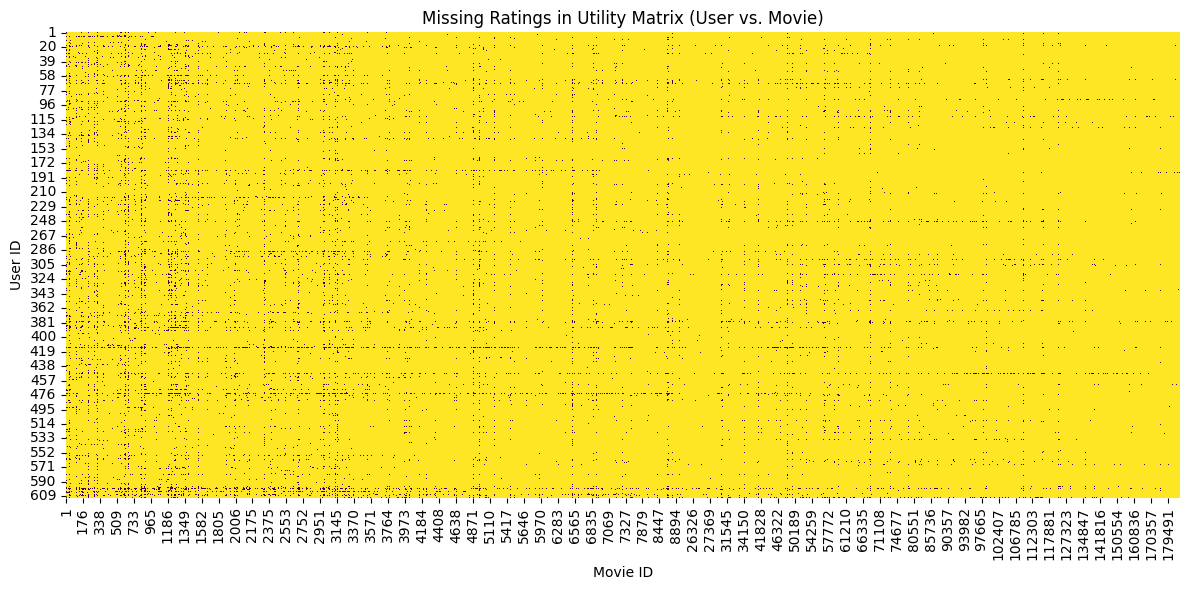

In [ ]:
# plot size
plt.figure(figsize=(12, 6))

# Plot missing data (True = missing)
sns.heatmap(utility_matrix.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Ratings in Utility Matrix (User vs. Movie)")
plt.xlabel("Movie ID")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()

#Exploratory Data Analysis

## univariate analysis


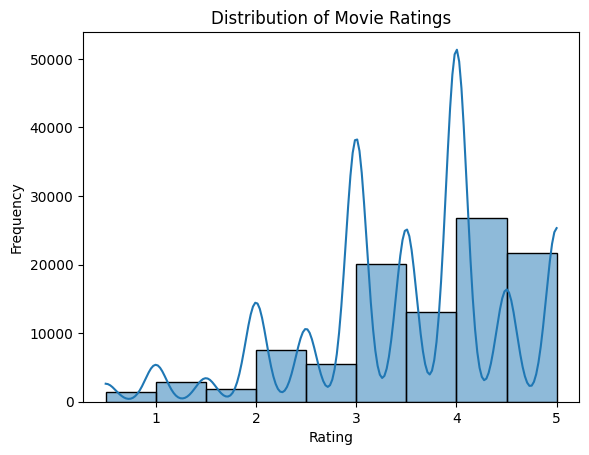

In [ ]:
#
sns.histplot(ratings['rating'], bins=9, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

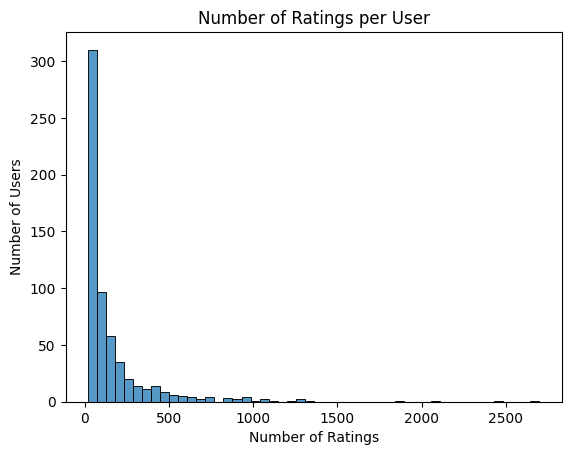

In [ ]:
user_rating_counts = ratings['userId'].value_counts()

sns.histplot(user_rating_counts, bins=50, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

In [ ]:
# Count number of ratings per user
user_rating_counts = df_merge_cleaned['userId_rating'].value_counts()

# Keep only users with at least 1 rating (i.e., user_rating_counts > 0 is always true, but it's okay for clarity)
active_users = user_rating_counts[user_rating_counts > 0].index

# Filter merged dataset to include only those active users
ratings_filtered = df_merge_cleaned[df_merge_cleaned['userId_rating'].isin(active_users)]

# Check shape or head
print(ratings_filtered.shape)

(227584, 10)


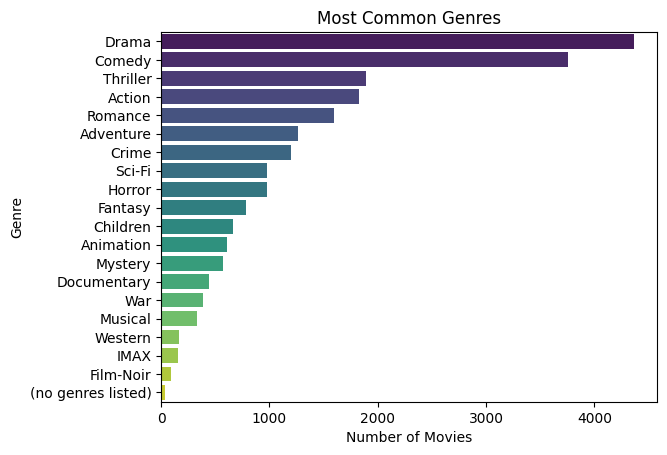

In [ ]:
genre_counts = movies['genres'].str.split('|').explode().value_counts()

sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title("Most Common Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

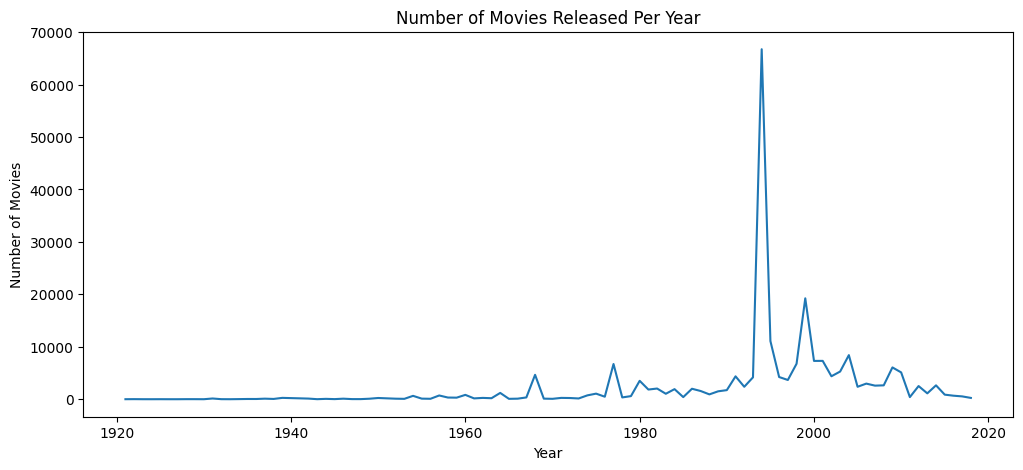

In [ ]:
df_merge_cleaned['year'] = df_merge_cleaned['year'].dropna().astype(int)

yearly_counts = df_merge_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

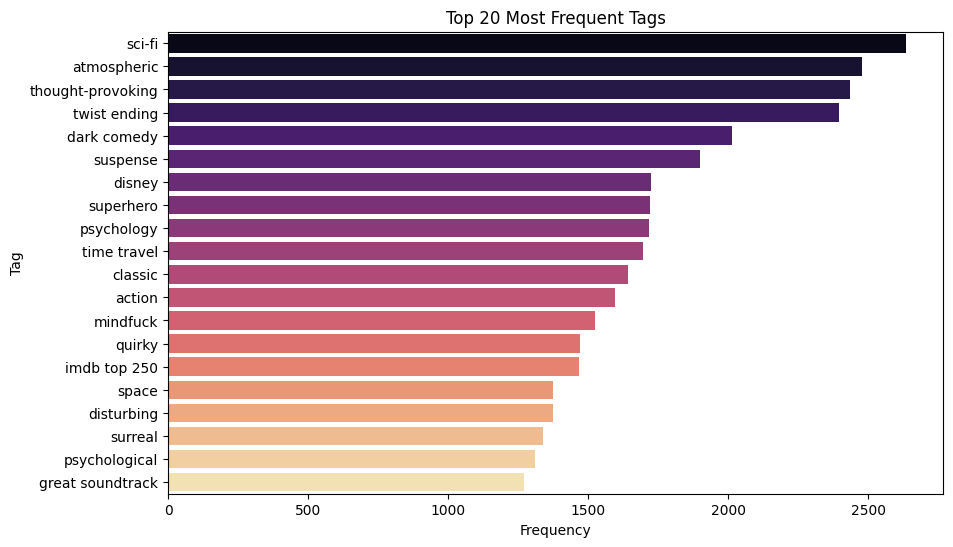

In [ ]:
top_tags = df_merge_cleaned['tag'].str.lower().value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_tags.index, x=top_tags.values, palette='magma')
plt.title("Top 20 Most Frequent Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()

In [ ]:
# rating per
user_counts = ratings['userId'].value_counts()
user_counts

,count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
442,20
278,20
147,20


# Bivariate analysis

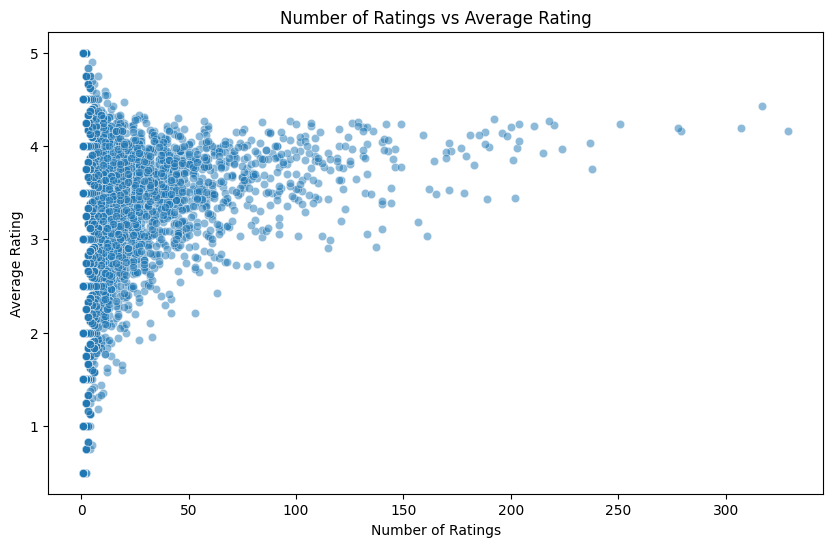

In [ ]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=movie_stats, x='count', y='mean', alpha=0.5)
plt.title("Number of Ratings vs Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
#active_users = df_merge_cleaned['userId_rating'].value_counts()
#df_merge_rating = df_merge_cleaned[df_merge_cleaned['userId_rating'].isin(active_users[active_users ==0].index)]
#df_merge_rating.shape


## Mutivariate Analysis


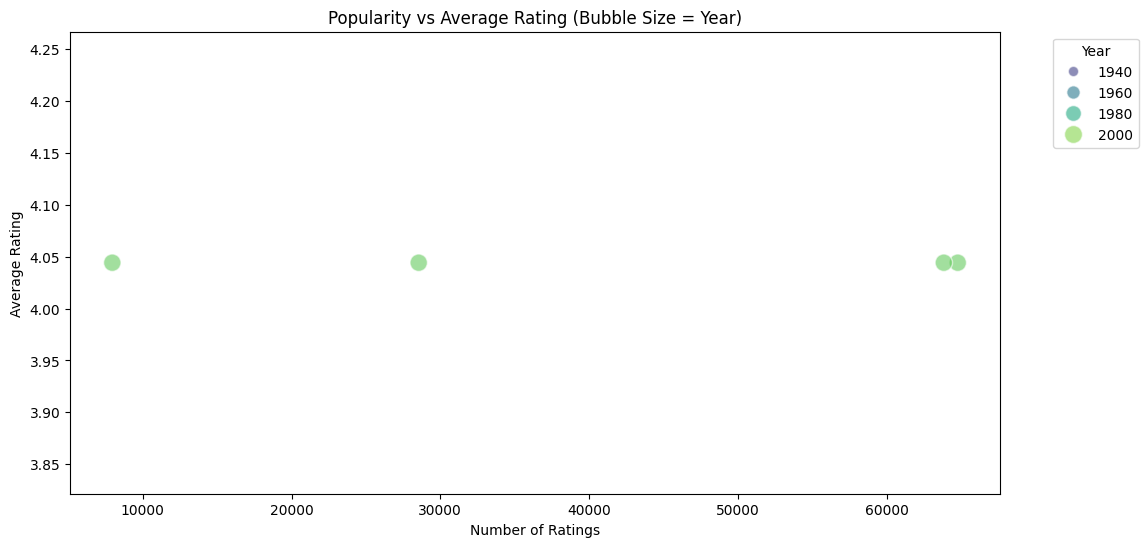

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_merge_cleaned,
    x=df_merge_cleaned['rating'].value_counts(), y=df_merge_cleaned['rating'].mean(),
    size=df_merge_cleaned['year'],  # Bubble size by release year
    hue=df_merge_cleaned['year'],
    sizes=(20, 200), palette='viridis', alpha=0.6
)
plt.title("Popularity vs Average Rating (Bubble Size = Year)")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#One-hot encoding
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df_exploded['genres'].str.split('|'))
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)


df_exploded = pd.concat([df_exploded, genre_df], axis=1)


print(df_exploded.head())


   movieId      title     genres  userId_rating  rating    timestamp_rating  \
0        1  Toy Story  Adventure              1     4.0 2000-07-30 18:45:03   
1        1  Toy Story  Animation              1     4.0 2000-07-30 18:45:03   
2        1  Toy Story   Children              1     4.0 2000-07-30 18:45:03   
3        1  Toy Story     Comedy              1     4.0 2000-07-30 18:45:03   
4        1  Toy Story    Fantasy              1     4.0 2000-07-30 18:45:03   

   userId_tag    tag       timestamp_tag       year  ...  Film-Noir  Horror  \
0         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
1         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
2         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
3         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
4         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thrill

In [ ]:


# Initialize LabelEncoders
# user_encoder = LabelEncoder()
# movie_encoder = LabelEncoder()

# # Fit and transform user IDs
# df_merge_cleaned['userId_encoded'] = user_encoder.fit_transform(df_merge_cleaned['userId_rating'])

# # Fit and transform movie IDs
# df_merge_cleaned['movieId_encoded'] = movie_encoder.fit_transform(df_merge_cleaned['movieId'])

# df_merge_cleaned['userId_tag_encoded'] = userId_tag_encoder.fit_transform(df_merge_cleaned['userId_tag'])

# print(df_merge_cleaned.head())


In [ ]:
# Initialize LabelEncoders
# user_encoder = LabelEncoder()
# movie_encoder = LabelEncoder()
# userid_encoder = LabelEncoder()


# df_exploded['userId_encoded'] = user_encoder.fit_transform(df_exploded['userId_rating'])


# df_exploded['movieId_encoded'] = movie_encoder.fit_transform(df_exploded['movieId'])

# df_exploded['userId_tag_encoded'] = userid_encoder.fit_transform(df_exploded['userId_tag'])

# print(df_exploded.head())


In [ ]:
# Initialize LabelEncoders
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
userid_encoder = LabelEncoder()


df_exploded['userId_rating'] = user_encoder.fit_transform(df_exploded['userId_rating'])


df_exploded['movieId'] = movie_encoder.fit_transform(df_exploded['movieId'])

df_exploded['userId_tag'] = userid_encoder.fit_transform(df_exploded['userId_tag'])

print(df_exploded.head())

   movieId      title     genres  userId_rating  rating    timestamp_rating  \
0        0  Toy Story  Adventure              0     4.0 2000-07-30 18:45:03   
1        0  Toy Story  Animation              0     4.0 2000-07-30 18:45:03   
2        0  Toy Story   Children              0     4.0 2000-07-30 18:45:03   
3        0  Toy Story     Comedy              0     4.0 2000-07-30 18:45:03   
4        0  Toy Story    Fantasy              0     4.0 2000-07-30 18:45:03   

   userId_tag    tag       timestamp_tag       year  ...  Film-Noir  Horror  \
0          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
1          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
2          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
3          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
4          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thrill

In [ ]:
# The utility matrix was already created in the provided code:
utility_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# To print the first few rows:
print(utility_matrix.head())


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

In [ ]:

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_exploded['tag'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


    06  1900s  1920s  1950s  1960s  1970s  1980s  1990s  2001  250  ...  york  \
0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
1  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
2  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
3  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
4  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   

   you  younger  your  zellweger  zither  zoe  zombie  zombies  zooey  
0  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
1  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
2  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
3  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
4  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  

[5 rows x 1741 columns]


## Scaling



In [ ]:
# prompt: perform minmax scaler for rating

# Assuming 'df_merge_cleaned' is your DataFrame and 'rating' is the column you want to scale
scaler = MinMaxScaler()
df_exploded['rating'] = scaler.fit_transform(df_exploded[['rating']])
df_exploded.head()


,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,year,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_encoded
0,0,Toy Story,Adventure,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0.714286
1,0,Toy Story,Animation,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0.714286
2,0,Toy Story,Children,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0.714286
3,0,Toy Story,Comedy,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0.714286
4,0,Toy Story,Fantasy,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0.714286


In [ ]:
# # prompt: Perform a PCA on the dataframe that has been preprocessed

# import pandas as pd
# from sklearn.decomposition import PCA

# # Assuming 'tfidf_df' is your TF-IDF matrix as a DataFrame
# # If not, replace 'tfidf_df' with the DataFrame you want to perform PCA on.
# # For example, if you want to use the one-hot encoded genres:
# # pca = PCA(n_components=2)  # Example: Reduce to 2 principal components
# # principal_components = pca.fit_transform(df_exploded[genre_df.columns])

# pca = PCA(n_components=0.95) #Example: Keep 95% variance
# principal_components = pca.fit_transform(tfidf_df)

# # Create a new DataFrame with the principal components
# pca_df = pd.DataFrame(data = principal_components)

# print(pca_df.head())
